In [1]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms"
# by
# Chanchal Chatterjee and Vwani P. Roychowdhury
# August 2021
#
# Experiments for Chapter 8 (e-shop-clothing-2008.csv Data)
# EVD on stationary data
# GEVD on stationary data#
#
# Author: Chanchal Chatterjee
#

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf


In [7]:
# Data obtained from UCI clickstream dataset for online shopping 
# https://archive.ics.uci.edu/ml/datasets/clickstream+data+for+online+shopping
# Load data into your unique bucket. 
# Here AdaptiveMLAlgorithms/Data/e-shop-clothing-2008.csv

In [8]:
dataset = pd.read_csv("../Data/e-shop-clothing-2008.csv")
dataset = dataset.dropna()
dataset = dataset.drop(['year','month','day','sessionID','clothing_model'], 1)
print(dataset.shape)
print(dataset.head())


(130421, 9)
   order  country  main_category  colour  location  model photography  price  \
0      1       29              1       1         5                  1   28.0   
1      2       29              1       1         6                  1   33.0   
2      3       29              2      10         2                  1   52.0   
3      4       29              2       6         6                  2   38.0   
4      5       29              2       4         3                  2   52.0   

   price2  page  
0     2.0   1.0  
1     2.0   1.0  
2     1.0   1.0  
3     2.0   1.0  
4     1.0   1.0  


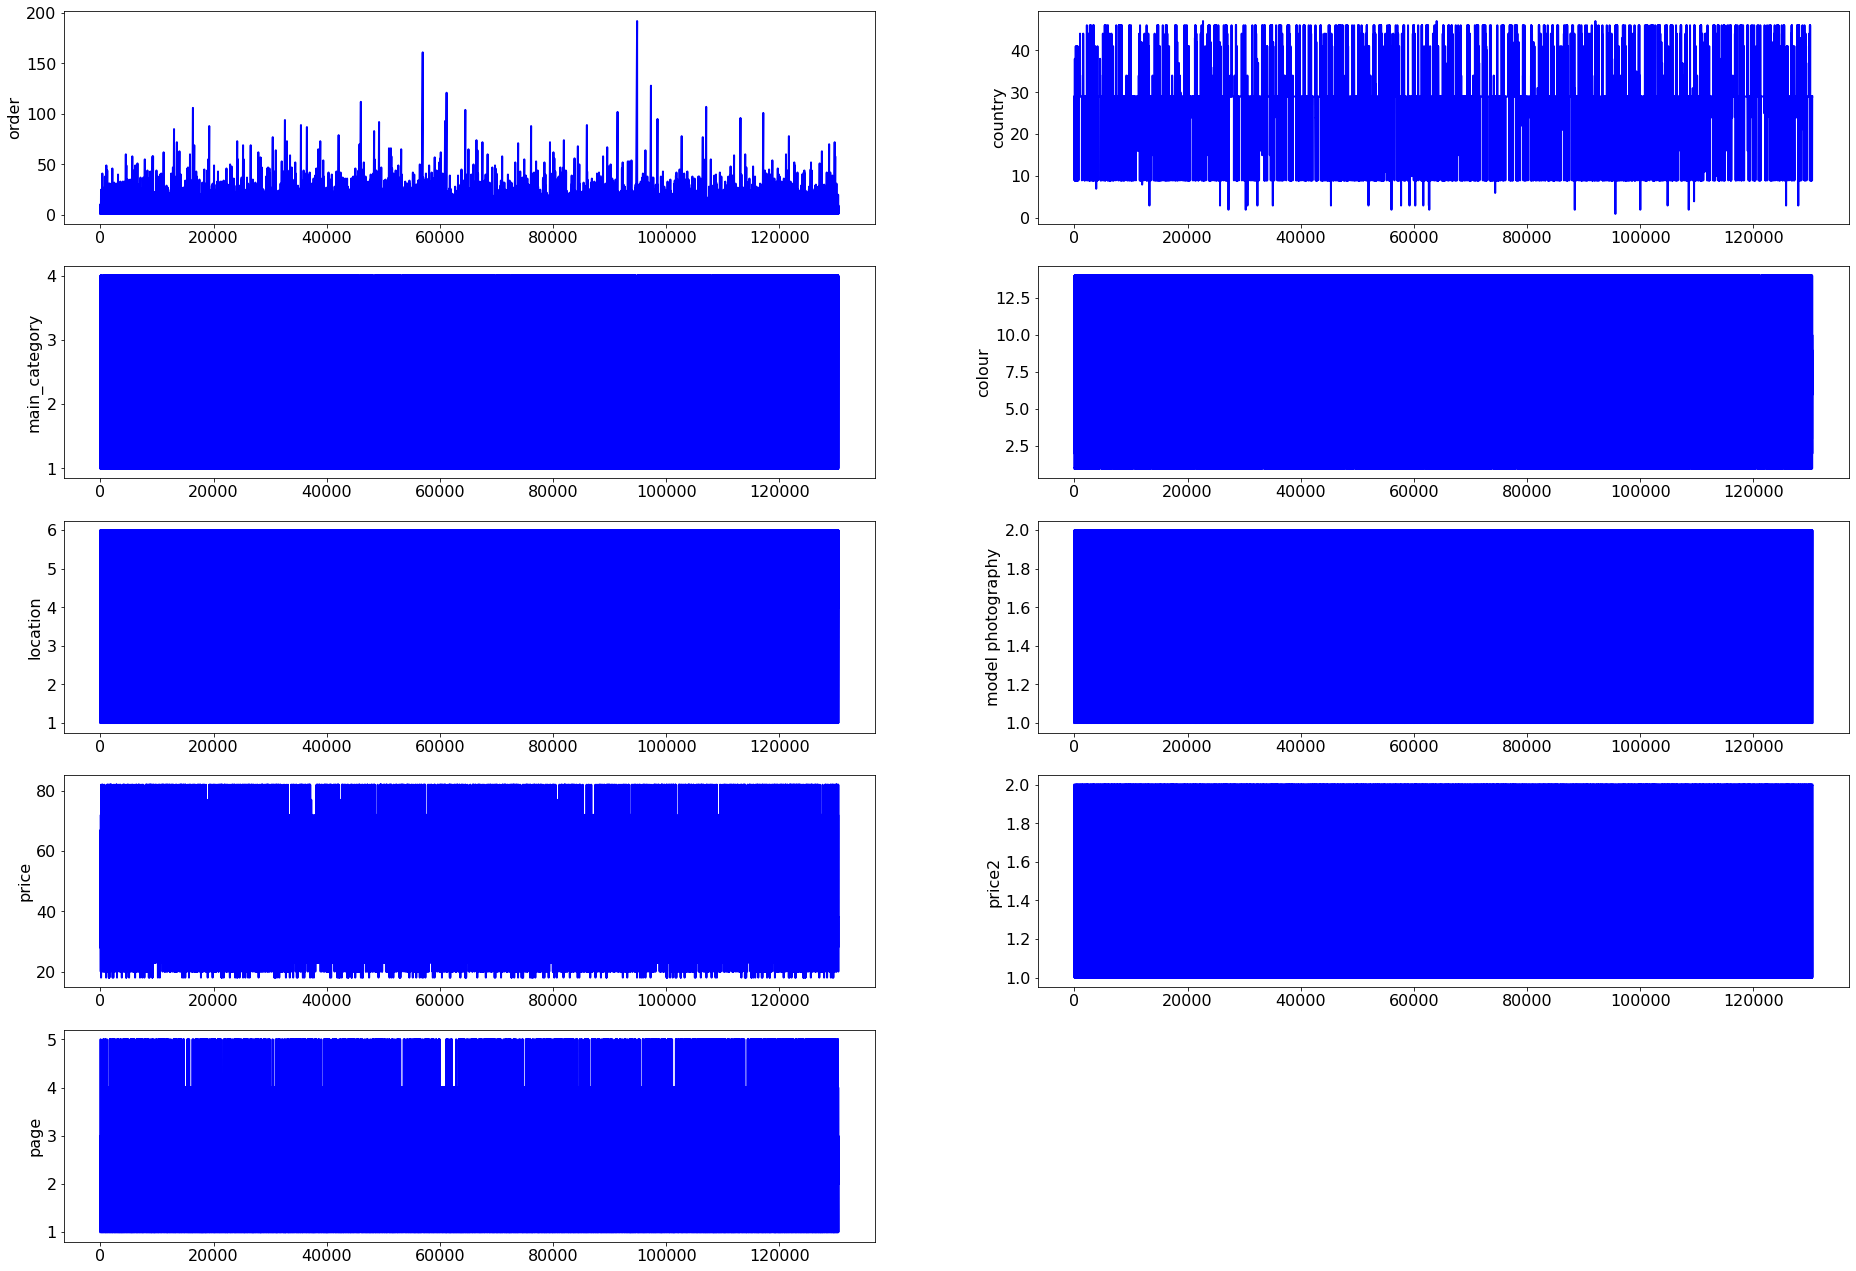

In [9]:
plt.figure(figsize=(32, 32))
plt.rcParams.update({'font.size': 16})
cols = dataset.columns
for i in range(dataset.shape[1]):
    plt.subplot(7, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(dataset[cols[i]], lw=2, color='b')
plt.show()


------------------------------------------
### Adaptive Linear Eigen Decomposition

In [12]:
# Square root of the correlation matrix
from scipy.linalg import eigh

X = dataset.T
nSamples = dataset.shape[0]

# Compute Correlation matrix and eigen vectors of the generated data
corX = (X @ X.T) / nSamples

# Eigenvalues and eigenvectors of corX
eigvals, eigvecs = eigh(corX)
print("eigvals =\n", eigvals[::-1])

EstV = np.fliplr(eigvecs)
EstD  = np.diag(eigvals[::-1])


eigvals =
 [2.89826340e+03 1.59152000e+02 8.62886348e+01 1.96110103e+01
 3.38135956e+00 1.45431988e+00 7.00214127e-01 3.41345085e-01
 1.60423090e-01]


In [14]:
# Adaptive algorithm
from numpy import linalg as la

nSamples = dataset.shape[0]
nDim = dataset.shape[1]

A = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
N = np.zeros(shape=(1,nDim)) # stores eigen norms
W = 0.1 * np.ones(shape=(nDim,nDim)) # stores adaptive eigenvectors
for iter in range(nSamples):
    cnt = iter + 1
    x = np.array(dataset.iloc[iter])
    x = x.reshape(nDim,1)
    A = A + (1.0/cnt)*((np.dot(x, x.T)) - A)
    etat = 1.0/(10000 + cnt)
    # Deflated Gradient Descent
    W = W + etat*(A @ W - 0.5*W @ np.triu(W.T @ A @ W) - 0.5*A @ W @ np.triu(W.T @ W))
    newnorm = la.norm(W, axis=0)
    N = np.vstack([N, newnorm])
print("W=\n", W)


W=
 [[ 0.17964651  0.9759451   0.11005403 -0.04364045 -0.01255557 -0.00983875
  -0.00688768 -0.00517989 -0.00422728]
 [ 0.49375823 -0.00572815 -0.8448616  -0.17783662 -0.05787339 -0.04705608
  -0.03234151 -0.02369289 -0.01874713]
 [ 0.04230587  0.0236425  -0.06526119  0.08025437  0.08362731  0.08029174
   0.05651909  0.04421618  0.03897274]
 [ 0.1148336   0.03186613 -0.1221839   0.97472867 -0.0451438  -0.10372779
  -0.05978747 -0.03364214 -0.01996731]
 [ 0.05917281  0.00839184 -0.04489304  0.06458548  0.74597286  0.72968404
   0.47245161  0.31785786  0.2296106 ]
 [ 0.02258305  0.00497552 -0.02018378  0.02063939  0.05633307  0.05521479
   0.03715585  0.02676701  0.02126379]
 [ 0.83865511 -0.21299909  0.49993342 -0.03137639 -0.01860549 -0.01608484
  -0.01064428 -0.00738165 -0.00549966]
 [ 0.02579218  0.00798026 -0.04165919  0.01497442  0.0934419   0.09128992
   0.05963898  0.04098416  0.03063286]
 [ 0.03056709  0.0199084  -0.02850038  0.06422393  0.00844185  0.00753134
   0.00900006  0.0

In [15]:
import math
from scipy.linalg import eigh
WTW = W.T @ W
WTAW = W.T @ A @ W
eigvals, eigvecs = eigh(A)
print("Lambda=\n", eigvals)
print("Diags of WTAW")
print([WTAW[i,i] for i in range(len(WTAW[0]))])
print("Diags of WTW")
print([WTW[i,i] for i in range(len(WTW[0]))])


Lambda=
 [1.60423090e-01 3.41345085e-01 7.00214127e-01 1.45431988e+00
 3.38135956e+00 1.96110103e+01 8.62886348e+01 1.59152000e+02
 2.89826340e+03]
Diags of WTAW
[2898.263381858756, 159.15104148325025, 86.28981286952595, 19.61096848681445, 1.975703275882232, 1.9267011339229407, 0.8021669209936735, 0.3624877546363355, 0.19098179957708972]
Diags of WTW
[1.0000000000141498, 0.9999998897560669, 0.9999948957733831, 0.9999977923077759, 0.5813362031623333, 0.5636540598203826, 0.23620455794107678, 0.10728503289542891, 0.056613561373792275]


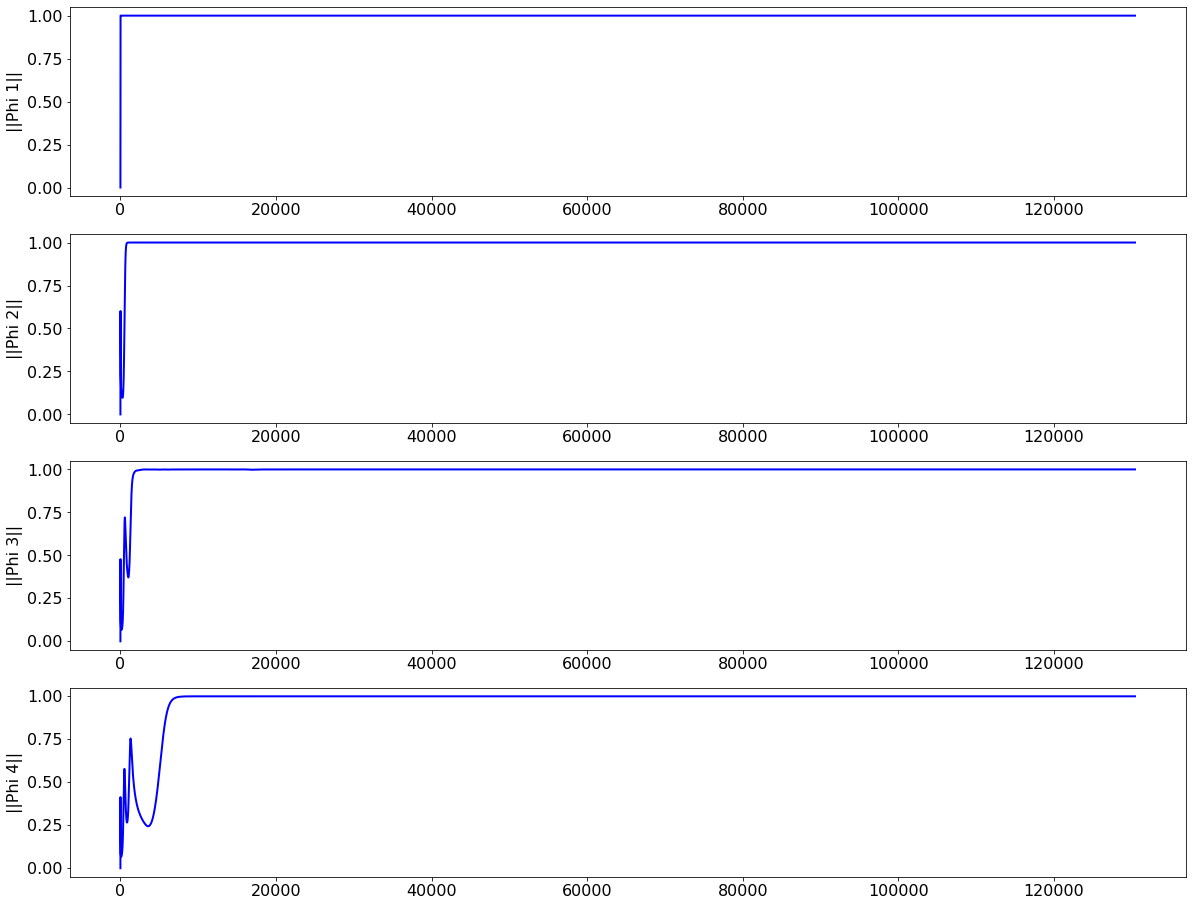

In [16]:
cols = dataset.columns
norms = pd.DataFrame({cols[0]: N[:, 0], cols[1]: N[:, 1], cols[2]: N[:, 2], cols[3]: N[:, 3]})

plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 16})
cols = norms.columns
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.ylabel('||Phi {}||'.format(i+1))
    plt.plot(norms[cols[i]], lw=2, color='b')
plt.show()

------------------------------------------
### Adaptive Linear Generalized Eigen Decomposition

In [17]:
dataset1 = dataset.drop(['price2'], 1)
print(dataset1.shape)
print(dataset1.head())


(130421, 8)
   order  country  main_category  colour  location  model photography  price  \
0      1       29              1       1         5                  1   28.0   
1      2       29              1       1         6                  1   33.0   
2      3       29              2      10         2                  1   52.0   
3      4       29              2       6         6                  2   38.0   
4      5       29              2       4         3                  2   52.0   

   page  
0   1.0  
1   1.0  
2   1.0  
3   1.0  
4   1.0  


In [18]:
# Adaptive algorithm
from numpy import linalg as la

nSamples = dataset1.shape[0]
nDim = dataset1.shape[1]

classes = np.array(dataset['price2']-1)
classes_categorical = tf.keras.utils.to_categorical(classes, num_classes=2)

M = np.zeros(shape=(nDim,2)) # stores adaptive correlation matrix
B = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
N = np.zeros(shape=(1,nDim)) # stores eigen norms
W = 0.1 * np.ones(shape=(nDim,nDim)) # stores adaptive eigenvectors
for iter in range(nSamples//4):
    cnt = iter + 1
    x = np.array(dataset1.iloc[iter])
    x = x.reshape(nDim,1)
    B = B + (1.0/cnt)*((np.dot(x, x.T)) - B)
    y = classes_categorical[iter].reshape(2,1)
    M = M + (1.0/cnt)*((np.dot(x, y.T)) - M)
    A = M @ M.T
    etat = 1.0/(1000000 + cnt)
    # Deflated Gradient Descent
    W = W + etat*(A @ W - 0.5* B @ W @ np.triu(W.T @ A @ W) - 0.5*A @ W @ np.triu(W.T @ B @ W))
    WTBW = W.T @ B @ W
    newnorm = [math.sqrt(WTBW[i,i]) for i in range(len(WTBW[0]))]
    N = np.vstack([N, newnorm])
print("W=\n", W)


W=
 [[ 0.05170244  0.06464727  0.06625458  0.0644491   0.06371877  0.0636608
   0.06407489  0.06476453]
 [ 0.00296595 -0.01677236 -0.02745882 -0.03928404 -0.04848995 -0.05615134
  -0.0624973  -0.06785774]
 [ 0.09035222  0.09040074  0.09145597  0.09126831  0.09125458  0.09125935
   0.09129619  0.09135321]
 [ 0.07285739  0.07552851  0.07792824  0.07784577  0.07809829  0.07844703
   0.07888863  0.079386  ]
 [ 0.08532715  0.08192585  0.07982332  0.0774761   0.07569639  0.0742626
   0.0730995   0.07213341]
 [ 0.09513143  0.09431394  0.09408012  0.09356474  0.09320017  0.09290627
   0.09267277  0.09248393]
 [-0.02256186 -0.04485283 -0.0239642  -0.01736355 -0.01136822 -0.00693455
  -0.0032493  -0.00025376]
 [ 0.09243478  0.09231323  0.09227067  0.09178549  0.09145189  0.09119191
   0.09099672  0.09084969]]


In [19]:
np.unique(classes)

array([0., 1.])

In [20]:
import math
from scipy.linalg import eigh
WTAW = W.T @ A @ W
WTBW = W.T @ B @ W
eigvals, eigvecs = eigh(A, B)
print("Lambda=\n", eigvals)
print("Diags of WTAW")
print([WTAW[i,i] for i in range(len(WTAW[0]))])
print("Diags of WTBW")
print([math.sqrt(WTBW[i,i]) for i in range(len(WTBW[0]))])


Lambda=
 [-3.09257205e-16 -2.88844568e-16  1.24474712e-17  2.41903688e-16
  6.09798893e-16  6.36306083e-16  2.05179419e-01  5.00594176e-01]
Diags of WTAW
[0.33514300505402017, 0.24144049618940971, 0.02170256560547658, 0.009373531575101424, 0.0037769088392056067, 0.0010247371725007183, 0.00012983962891304564, 0.0002117885409313611]
Diags of WTBW
[1.173108474909125, 1.2583233688721487, 1.0120253561050683, 0.9756693249454611, 0.9636242330487226, 0.9679521958581271, 0.9809234130088776, 0.9984927936320988]


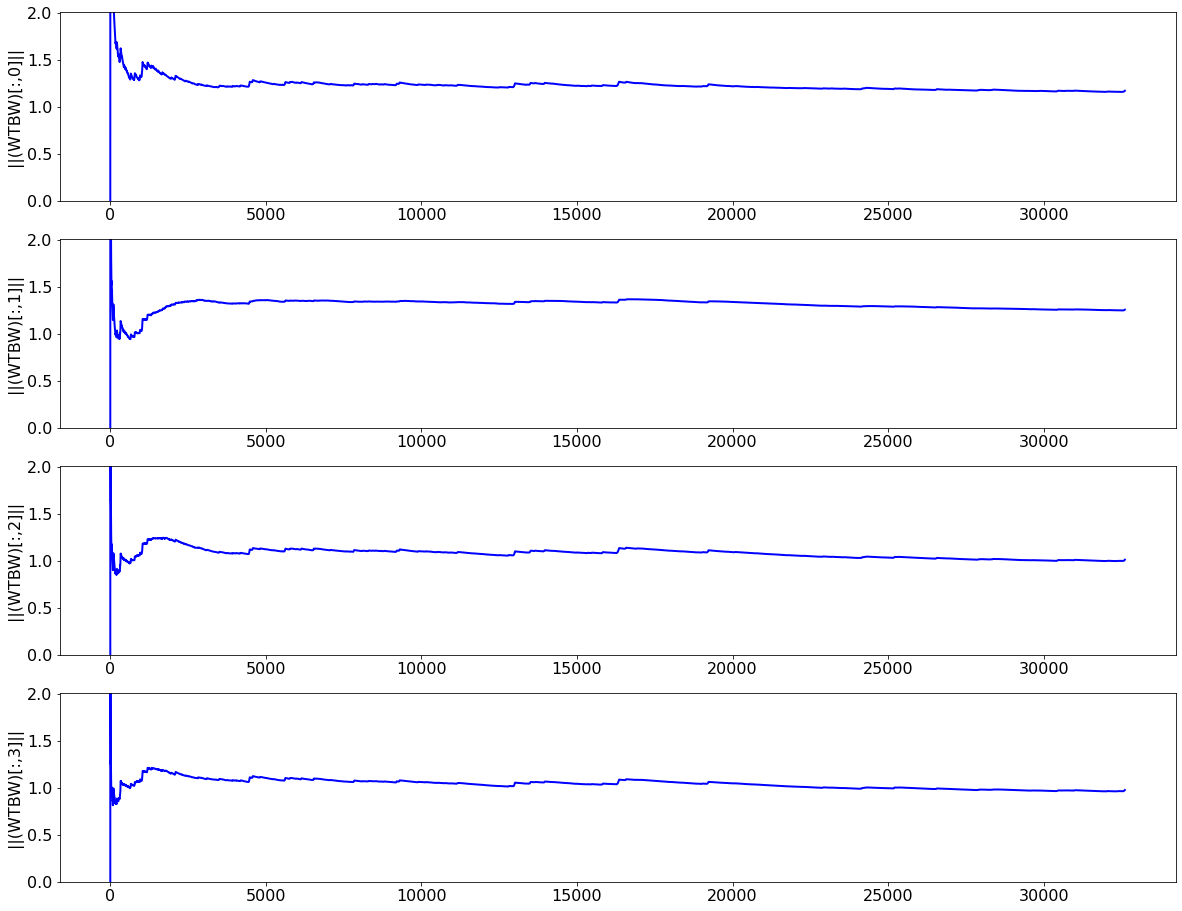

In [21]:
cols = dataset1.columns
norms = pd.DataFrame({cols[0]: N[:, 0], cols[1]: N[:, 1], cols[2]: N[:, 2], cols[3]: N[:, 3], \
                      cols[4]: N[:, 4], cols[5]: N[:, 5], cols[6]: N[:, 6], cols[7]: N[:, 7]})

plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 16})
cols = norms.columns
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.ylabel('||(WTBW)[:,{}]||'.format(i))
    plt.ylim([0,2.01])
    plt.plot(norms[cols[i]], lw=2, color='b')
plt.show()
